# Logistic Regression and Classification metrics

<hr/>

### Implementing Binary Classification with Logistic Regression 

## Dataset

In this example, we will be using "Social_Network_Ads" dataset. 

The variable descriptions are as follows:

* Age
* EstimatedSalary

The target feature is:
* Purchased

Problem Statement: To predict if a person will purchase an item based on age and estimated salary. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
data_SNA= pd.read_csv("https://www.dropbox.com/s/bkjsx9vxgb2yu19/Social_Network_Ads.csv?dl=1")

In [ ]:
data_SNA.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
data_SNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
data_SNA["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

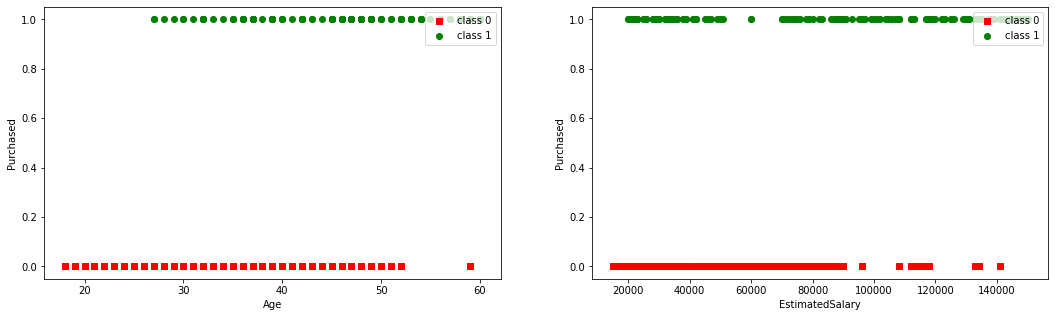

In [ ]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

target_classes = (0,1)
colors = ("red", "green")
markers = ("s", "o")
for target_class, color, marker in zip(target_classes, colors, markers):
  ax1.scatter(
          x=data_SNA[data_SNA["Purchased"] == target_class]["Age"],
          y=data_SNA[data_SNA["Purchased"] == target_class]["Purchased"],
          color = color,
          label = f"class {target_class}",
          marker = marker,
      )

ax1.set_xlabel("Age")
ax1.set_ylabel("Purchased")
ax1.legend(loc="upper right")

target_classes = (0,1)
colors = ("red", "green")
markers = ("s", "o")
for target_class, color, marker in zip(target_classes, colors, markers):
  ax2.scatter(
          x=data_SNA[data_SNA["Purchased"] == target_class]["EstimatedSalary"],
          y=data_SNA[data_SNA["Purchased"] == target_class]["Purchased"],
          color = color,
          label = f"class {target_class}",
          marker = marker,
      )

ax2.set_xlabel("EstimatedSalary")
ax2.set_ylabel("Purchased")
ax2.legend(loc="upper right")
plt.show()

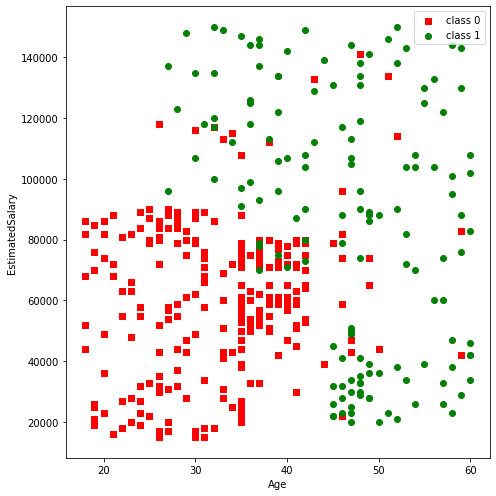

In [ ]:
plt.figure(figsize = (7,7))
target_classes = (0,1)
colors = ("red", "green")
markers = ("s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    plt.scatter(
        x=data_SNA[data_SNA["Purchased"] == target_class]["Age"],
        y=data_SNA[data_SNA["Purchased"] == target_class]["EstimatedSalary"],
        color=color,
        label=f"class {target_class}",
        marker=marker,
    )

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Lets fit a Logistic regression model to the data

<hr/>

### Splitting the dataset into the Training set and Test set

In [ ]:
train, test = train_test_split(data_SNA, test_size = 0.25, random_state = 0)

In [ ]:
train.shape

(300, 3)

In [ ]:
test.shape

(100, 3)

In [ ]:
train["Purchased"].value_counts()

0    189
1    111
Name: Purchased, dtype: int64

In [ ]:
test["Purchased"].value_counts()

0    68
1    32
Name: Purchased, dtype: int64

The dataset before split has 257 instances belonging to class 0 and 143 instances belonging to class 1

257/(257+143) = 0.6425 \
143/(257+143) = 0.3575

The dataset after the split:
1. The training set has 189 instances belonging to class 0 and 111 instances belonging to class 1 \

189/(189+111) = 0.63 \
111/(189+111) = 0.37

2. The testing set has 68 instances belonging to class 0 and 32 instances belonging to class 1

68/(68+32) = 0.68 \
32/(68+32) = 0.32

It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [ ]:
train, test = train_test_split(data_SNA, test_size = 0.25, random_state = 0, stratify = data_SNA["Purchased"])

In [ ]:
train.shape

(300, 3)

In [ ]:
test.shape

(100, 3)

In [ ]:
train["Purchased"].value_counts()

0    193
1    107
Name: Purchased, dtype: int64

In [ ]:
test["Purchased"].value_counts()

0    64
1    36
Name: Purchased, dtype: int64

The dataset after the split:
1. The training set has 189 instances belonging to class 0 and 111 instances belonging to class 1 \

193/(193+107) = 0.643 \
107/(193+107) = 0.356

2. The testing set has 68 instances belonging to class 0 and 32 instances belonging to class 1

64/(64+36) = 0.64 \
36/(64+36) = 0.36

### Feature Scaling

In [ ]:
scaler = StandardScaler()
numerical_data_pipeline = Pipeline([("std_scaler", StandardScaler())])
X_train = numerical_data_pipeline.fit_transform(train[["Age","EstimatedSalary"]])
X_test = numerical_data_pipeline.transform(test[["Age","EstimatedSalary"]])
y_train = np.array(train["Purchased"])
y_test = np.array(test["Purchased"])

## Visualization in the transformed feature space

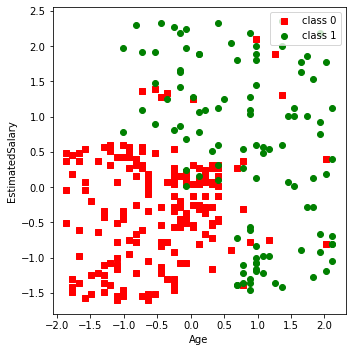

In [ ]:
plt.figure(figsize = (5,5))
target_classes = (0,1)
colors = ("red", "green")
markers = ("s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    plt.scatter(
        x=X_train[y_train == target_class,0],
        y=X_train[y_train == target_class,1],
        color=color,
        label=f"class {target_class}",
        marker=marker,
    )

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### Training the Logistic Regression model on the Training set

## Lets fit a model between "Age" and "Purchased"

In [ ]:
model = LogisticRegression(random_state = 0)
model.fit(X_train[:,0].reshape(-1,1), y_train)

LogisticRegression(random_state=0)

In [ ]:
intercpt = model.intercept_

In [ ]:
coef = model.coef_

In [ ]:
print(intercpt, coef)

[-0.90036459] [[1.87154928]]


# Lets plot the decision boundary

https://rasbt.github.io/mlxtend/#examples

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


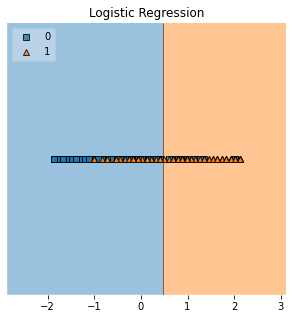

In [ ]:
from mlxtend.plotting import plot_decision_regions
label = 'Logistic Regression'
plt.figure(figsize = (5,5))
fig = plot_decision_regions(X=X_train[:,0].reshape(-1,1), y=y_train, clf=model, legend=2)
plt.title(label)
plt.show()

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
sig_val = sigmoid(intercpt + coef*X_train[:,0].reshape(-1,1))

In [ ]:
sig_val[0:5]

array([[0.37999627],
       [0.37999627],
       [0.03452835],
       [0.92616963],
       [0.07995648]])

In [ ]:
y_train_prob = model.predict_proba(X_train[:,0].reshape(-1,1))

In [ ]:
y_train_prob[0:5]

array([[0.62000373, 0.37999627],
       [0.62000373, 0.37999627],
       [0.96547165, 0.03452835],
       [0.07383037, 0.92616963],
       [0.92004352, 0.07995648]])

In [ ]:
def fun_plot_decision_boundary(decision_val):
  target_class_new = np.zeros_like(y_train_prob[:,0])
  target_class_new[y_train_prob[:,1] >= decision_val] = 1 

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)

  target_classes = (0,1)
  colors = ("red", "green")
  markers = ("s", "o")

  for target_class, color, marker in zip(target_classes, colors, markers):
    ax.scatter(
            x=X_train[target_class_new == target_class,0],
            y=target_class_new[target_class_new == target_class],
            color = color,
            label = f"class {target_class}",
            marker = marker,
        )
    
  ax.scatter(
            x=X_train[:,0],
            y=sig_val, s= 5
        )
  val = min(X_train[target_class_new == 1,0])
  ax.plot([-2,2],[decision_val,decision_val])
  ax.plot([val,val],[0,1])

  ax.set_xlabel("Age")
  ax.set_ylabel("Purchased")
  ax.legend(loc="upper right")

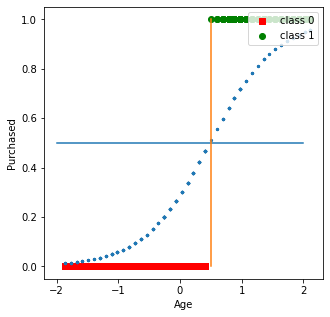

In [ ]:
fun_plot_decision_boundary(0.5)

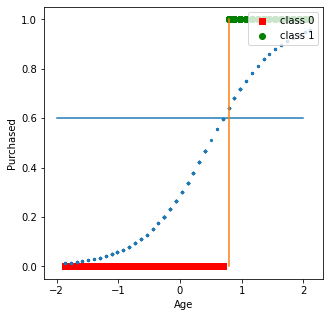

In [ ]:
fun_plot_decision_boundary(0.6)

## Lets fit a model between "Age", "EstimatedSalary" and "Purchased"

In [ ]:
model_2feat = LogisticRegression(random_state = 0)
model_2feat.fit(X_train, y_train)

LogisticRegression(random_state=0)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


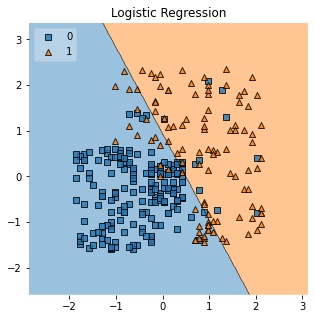

In [ ]:
label = 'Logistic Regression'
plt.figure(figsize = (5,5))
fig = plot_decision_regions(X=X_train, y=y_train, clf=model_2feat , legend=2)
plt.title(label)
plt.show()

<hr/>

### Model Evaluation 

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
* Accuracy
* Precision
* Recall
* F1-Score
* ROC curve
* AUROC

<hr/>

### Confusion Matrix

* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. 

  * **true positive** for correctly predicted event values.
  * **false positive** for incorrectly predicted event values.
  * **true negative** for correctly predicted no-event values.
  * **false negative** for incorrectly predicted no-event values.


![](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png)

In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model_2feat.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[58,  6],
       [13, 23]])

In [ ]:
tp, fn, fp, tn = cm.reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 58 6 13 23


Homework: How does the confusion matrix look for a multiclass classification problem?

<hr/>

**Accuracy:** It is the ratio of the number of correct predictions to the total number of input samples.

It measures how often the classifier correctly predicts.

accuracy = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.81

Limitation of accuracy score:
If the data set is highly imbalanced, and the model classifies all the data points as the majority class data points, the accuracy will be high. This makes accuracy not a reliable performance metric for imbalanced data.

Imagine the scenario where we had 99 images of the dog and only 1 image of a cat present in our training data. Then our model would always predict the dog, and therefore we got 99% accuracy. 

Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes.

In reality, Data is always imbalanced for example Spam email, credit card fraud, and medical diagnosis. Hence, if we want to do a better model evaluation and have a full picture of the model evaluation, other metrics such as recall and precision should also be considered.

<hr/>

#### Precision-Recall Metrics

* **Precision:** summarizes the fraction of examples assigned the positive class that belongs to the positive class.

    Precision = $\mathbf{\frac{TruePositive}{TruePositive + FalsePositive}}$

* **Recall:** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

   Recall = $\mathbf{\frac{TruePositive}{TruePositive + FalseNegative}}$

Also called Sensitivity / True Positive Rate 

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $\mathbf{\frac{2*Precision*Recall}{Precision+Recall}}$

Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives. 

Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.

So basically if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to focus on minimising False positives, then our focus should be to make Precision as close to 100% as possible.

F1 Score is the harmonic mean of precision and recall. It is maximum when Precision is equal to Recall.

If one number is really small between precision and recall, the F1 Score kind of raises a flag and is more closer to the smaller number than the bigger one, giving the model an appropriate score rather than just an arithmetic mean.

Why harmonic mean? To mitigate the impact of large outliers and aggravate the impact of small ones

In [ ]:
from sklearn.metrics import classification_report

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        64
           1       0.79      0.64      0.71        36

    accuracy                           0.81       100
   macro avg       0.81      0.77      0.78       100
weighted avg       0.81      0.81      0.80       100



Macro average is the average of precision/recall/f1-score. \
Weighted average is just the weighted average of precision/recall/f1-score.




<hr/>

#### Plotting precision-recall curve using sklearn

The precision-recall curve shows the tradeoff between precision and recall for different threshold.

Lowering the classifier threshold may increase recall, by increasing the number of true positive results. It is also possible that lowering the threshold may leave recall unchanged, while the precision fluctuates.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py


The relationship between recall and precision can be observed in the stairstep area of the plot - at the edges of these steps a small change in the threshold considerably reduces precision, with only a minor gain in recall.

Thus every point on the PRC represents a chosen cut-off even though you cannot see this cut-off. What you can see is the precision and the recall that you will get when you choose this cut-off. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


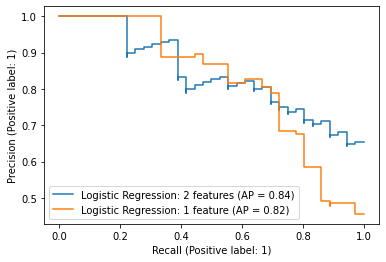

In [ ]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model_2feat, X_test, y_test, ax = plt.gca(), name = 'Logistic Regression: 2 features')

plot_precision_recall_curve(model, X_test[:,0].reshape(-1,1), y_test, ax = plt.gca(), name = 'Logistic Regression: 1 feature')

The above diagram shows the blue and green line as precision-recall curve.

Precision-recall curves are often zigzag curves frequently going up and down. Therefore, precision-recall curves tend to cross each other much more frequently than ROC curves. This can make comparisons between curves challenging. 

However, curves close to the PRC for a perfect test have a better performance level than the ones closes to the baseline. In other words, a curve above the other curve has a better performance level.

<hr/>

### ROC-AUC curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

TPR: recall

Specificity / True Negative Rate: TN/(TN+FP)

False Positive Rate: FP/(TN+FP) = 1- specificity

In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.

Area Under Curve (AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problems.

AUC has a range of [0, 1]. The greater the value, the better is the performance of our model.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


In [ ]:
# roc_curve() computes the ROC for the classifier and returns the FPR, TPR, and threshold values
from sklearn.metrics import roc_curve

# YOUR CODE HERE to fit(X_train, y_train) on 'classifier'
pred_prob1 = model_2feat.predict_proba(X_test)
pred_prob2 = model.predict_proba(X_test[:,0].reshape(-1,1))

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

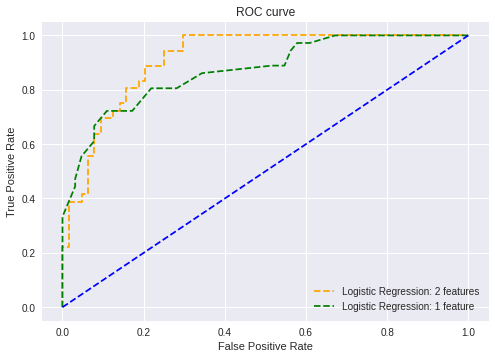

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression: 2 features')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression: 1 feature')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The above diagram shows:

ROC curve: is the orange dotted line

AUROC: is the area under the orange dotted line

The blue dotted line is the reference line.

In [ ]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression (2 features):", roc_auc_score(y_test, pred_prob1[:,1]))
print("Logistic Regression (1 feature):", roc_auc_score(y_test, pred_prob2[:,1]))

Logistic Regression (2 features): 0.9127604166666667
Logistic Regression (1 feature): 0.87109375


ROC or Precision-Recall curve

ROC curves have an attractive property: they are insensitive to changes in class distribution. If the proportion of positive to negative instances changes in a test set, the ROC curves won’t change. This feature of ROC curve is known as Class skew independence.
This is because the metrics TPR and FPR used for ROC are independent of the class distribution as compared to other metrics like accuracy, precision, etc., which are impacted by imbalanced class distributions.

ROC curves should be used when there are roughly equal numbers of observations for each class. \
Precision-Recall curves should be used when there is a moderate to large class imbalance.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/

Homework: Read about ROC curve and PR curve for multi class classification problem